# Multivariate Linear Regression Using Gradient Descent

## Attribute Information

### This problem has the following inputs: 
1. Frequency, in Hertzs. 
2. Angle of attack, in degrees. 
3. Chord length, in meters. 
4. Free-stream velocity, in meters per second. 
5. Suction side displacement thickness, in meters. 

### Output: 
6. Scaled sound pressure level, in decibels. 

In [31]:
# explain data more

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline

num_train_examples = 1502
train_input = np.loadtxt('airfoil_self_noise.dat',float,usecols=(0,1,2,3,4))[0:num_train_examples]
train_output = np.loadtxt('airfoil_self_noise.dat',float,usecols=(5))[0:num_train_examples]

In [32]:
test_input = np.loadtxt('airfoil_self_noise.dat',float,usecols=(0,1,2,3,4))[-1]
test_output = np.loadtxt('airfoil_self_noise.dat',float,usecols=(5))[-1]

In [33]:
# normalize inputs

mean_frq = np.mean(train_input[0:,:1])
mean_ang = np.mean(train_input[0:,1:2])
mean_len = np.mean(train_input[0:,2:3])
mean_vel = np.mean(train_input[0:,3:4])
mean_thk = np.mean(train_input[0:,4:])

frq_std = np.std(train_input[0:,:1])
ang_std = np.std(train_input[0:,1:2])
len_std = np.std(train_input[0:,2:3])
vel_std = np.std(train_input[0:,3:4])
thk_std = np.std(train_input[0:,4:])

train_input[0:,:1] = (train_input[0:,:1]-mean_frq)/frq_std
train_input[0:,1:2] = (train_input[0:,1:2]-mean_ang)/ang_std
train_input[0:,2:3] = (train_input[0:,2:3]-mean_len)/len_std
train_input[0:,3:4] = (train_input[0:,3:4]-mean_vel)/vel_std
train_input[0:,4:] = (train_input[0:,4:]-mean_thk)/thk_std

# normalize test data
test_input = np.array(test_input)
test_input[0] = (test_input[0]-mean_frq)/frq_std
test_input[1] = (test_input[1]-mean_ang)/ang_std
test_input[2] = (test_input[2]-mean_len)/len_std
test_input[3] = (test_input[3]-mean_vel)/vel_std
test_input[4] = (test_input[4]-mean_thk)/thk_std

In [34]:
def update_w_and_b(x,y,w,b,alpha):
    num_examples = x.shape[0]                          
    num_feat = x.shape[1]                             
    
    # obtain gradients
    # derivatives of loss func. with respect to weights and bias
    dl_dw = np.zeros((num_examples,num_feat)) 
    dl_db = np.zeros(num_examples)            
    for i in range(num_examples):
        for j in range(num_feat): 
            dl_dw[i,j] += -2*x[i,j]*(y[i]-(w[i,j]*x[i,j]+b[i])) 
            dl_db[i] += -2*(y[i]-(w[i,j]*x[i,j]+b[i]))  
    
    # update weights and bias based off of derivatives
    for i in range(num_examples):
        for j in range(num_feat):
            w[i,j] = w[i,j] - (1/float(num_feat))*alpha*dl_dw[i,j]  
        b[i] = b[i] - (1/float(num_feat))*alpha*dl_db[i]
    return w,b

def hypothesis(x,w,b):
    n = x.shape[0]
    h = 0
    for i in range(n):
        h += x[i]*w[i]
    return(h+b)
        
def avg_loss(x,y,w,b): 
    num_examples = x.shape[0]
    loss = 0
    for i in range(num_examples):
        h = hypothesis(x[i,],w[i,],b[i])
        loss += (1/(2*num_examples))*(h-y[i])**2 # test parameters
        return(loss,h)

def train(x,y,w,b,alpha,epochs):
    for epoch in range(epochs+1):
        w,b= update_w_and_b(x,y,w,b,alpha)
        if epoch % 50 == 0:
            loss, h = avg_loss(x,y,w,b)
            print('epoch: %s, loss: %s' %(epoch,loss)) 
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.plot(epoch, loss,'bo')
    plt.show()
    return(w,b)

epoch: 0, loss: 5.286414205089769
epoch: 50, loss: 4.559138631968373
epoch: 100, loss: 3.9118377315976303
epoch: 150, loss: 3.337293975783899
epoch: 200, loss: 2.828891295542851
epoch: 250, loss: 2.38056679099925
epoch: 300, loss: 1.9867662459376336
epoch: 350, loss: 1.6424031502447622
epoch: 400, loss: 1.3428209565035414
epoch: 450, loss: 1.0837583182371298
epoch: 500, loss: 0.8613170768983679
epoch: 550, loss: 0.6719327827803493
epoch: 600, loss: 0.5123475517059164
epoch: 650, loss: 0.3795850747450772
epoch: 700, loss: 0.2709276124094479
epoch: 750, loss: 0.18389481787385234
epoch: 800, loss: 0.11622424586198589
epoch: 850, loss: 0.06585341498396224
epoch: 900, loss: 0.030903301600859318
epoch: 950, loss: 0.009663152781785705
epoch: 1000, loss: 0.0005765146741327774


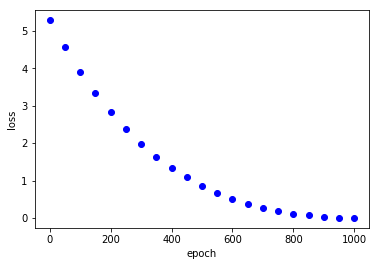

In [35]:
weights = np.zeros(train_input.shape)
biases = np.zeros(num_train_examples)
w,b = train(train_input,train_output,weights,biases,0.0003,1000)

epoch: 0, loss: 5.286414205089769
epoch: 50, loss: 4.559138631968373
epoch: 100, loss: 3.9118377315976303
epoch: 150, loss: 3.337293975783899
epoch: 200, loss: 2.828891295542851
epoch: 250, loss: 2.38056679099925
epoch: 300, loss: 1.9867662459376336
epoch: 350, loss: 1.6424031502447622
epoch: 400, loss: 1.3428209565035414
epoch: 450, loss: 1.0837583182371298
epoch: 500, loss: 0.8613170768983679
epoch: 550, loss: 0.6719327827803493
epoch: 600, loss: 0.5123475517059164
epoch: 650, loss: 0.3795850747450772
epoch: 700, loss: 0.2709276124094479
epoch: 750, loss: 0.18389481787385234
epoch: 800, loss: 0.11622424586198589
epoch: 850, loss: 0.06585341498396224
epoch: 900, loss: 0.030903301600859318
epoch: 950, loss: 0.009663152781785705
epoch: 1000, loss: 0.0005765146741327774
epoch: 1050, loss: 0.0022283806842782056
epoch: 1100, loss: 0.01333337131658734
epoch: 1150, loss: 0.03272486439147154
epoch: 1200, loss: 0.05934500070316819
epoch: 1250, loss: 0.09223549602601191
epoch: 1300, loss: 0.130

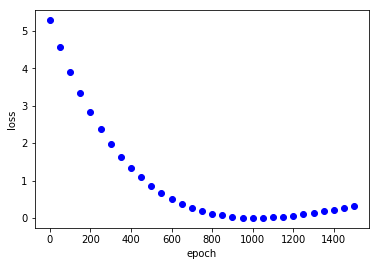

In [7]:
weights = np.zeros(train_input.shape)
biases = np.zeros(num_train_examples)
w,b = train(train_input,train_output,weights,biases,0.0003,1500)